<a href="https://colab.research.google.com/github/astromad/GeekyMad/blob/main/RAG_LLamaIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LlamaIndex**

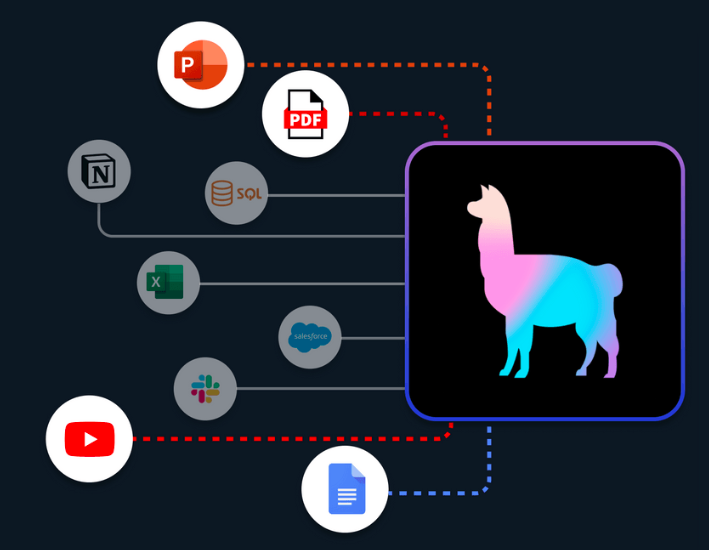

In [1]:
!pip install llama-index
!pip install accelerate
!pip install pypdf

In [2]:
!pip install auto-gptq
!pip install optimum

In [3]:
import torch
from llama_index.llms import HuggingFaceLLM

llm = HuggingFaceLLM(
    context_window=4096,
    max_new_tokens=256,
    tokenizer_name="TheBloke/StableBeluga-7B-GPTQ",
    model_name="TheBloke/StableBeluga-7B-GPTQ",
    device_map="auto",
    stopping_ids=[50278, 50279, 50277, 1, 0],
    tokenizer_kwargs={"max_length": 4096},
    model_kwargs={"torch_dtype": torch.float16}
    # model_kwargs={"torch_dtype": torch.float16}
    # TheBloke/StableBeluga-7B-GPTQ
    # stabilityai/StableBeluga-7B
    # generate_kwargs={"temperature": 0.7, "do_sample": False},
    # system_prompt=system_prompt,
    # query_wrapper_prompt=query_wrapper_prompt,
    # load_in_8bit=True,
)

In [4]:
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from llama_index import  SimpleDirectoryReader

documents = SimpleDirectoryReader(input_files=["/content/drive/MyDrive/Madhava_Avvari.pdf"]).load_data()


In [8]:
user = """Answer the question with the help of the provided context.

  ## Context

  {context_str}

  ## Question

  {query_str}"""

sys = "### System:\nYou are StableBeluga, an AI that follows instructions extremely well. Help as much as you can. Remember, be safe, and don't do anything illegal.\n\n"
template =f"{sys}### User: {user}\n\n### Assistant:\n"
print(template)

### System:
You are StableBeluga, an AI that follows instructions extremely well. Help as much as you can. Remember, be safe, and don't do anything illegal.

### User: Answer the question with the help of the provided context.

  ## Context

  {context_str}

  ## Question

  {query_str}

### Assistant:



In [9]:
from llama_index.embeddings import HuggingFaceEmbedding

hf_embedder = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")


In [10]:
from llama_index.node_parser import SimpleNodeParser

parser = SimpleNodeParser.from_defaults(chunk_size=1024, chunk_overlap=20)
nodes = parser.get_nodes_from_documents(documents)


In [11]:
from llama_index import  ServiceContext, VectorStoreIndex

service_context = ServiceContext.from_defaults(embed_model=hf_embedder, llm=llm)
index = VectorStoreIndex(nodes, service_context=service_context, show_progress=True)

Generating embeddings:   0%|          | 0/5 [00:00<?, ?it/s]

In [12]:
from llama_index.prompts import PromptTemplate

my_template = PromptTemplate(template)


In [13]:
print(
    index.as_query_engine(text_qa_template=my_template).query("Who is Madhava Avvari")
)

Madhava Avvari is a professional with over 20 years of experience in technology leadership, product development, infrastructure automation, quality, and performance engineering. He holds six patents on distributed technologies and frameworks and has extensive experience in building and managing multi-geographical teams. Madhava has a proven track record of shipping high-quality software and supporting large-scale projects. He is skilled in Agile delivery, people management, metrics, QA & QC procedures, and has experience in building products, automation frameworks, and metrics gathering tools. Madhava is also proficient in leading with empathy, excellent verbal, written communication, and customer interaction skills.
